In [1]:
# from google.colab import drive

# drive.mount("/content/drive")
# import pandas as pd

# df = pd.read_csv(
#     "/content/drive/MyDrive/Maestría En Ciencia de Datos/Segundo Trimestre/MachineLearning1/FinalProject/data/classification.csv"
# )

In [2]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    PrecisionRecallDisplay as PRDisplay,
)

import numpy as np

import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/classification.csv")

In [4]:
display(df.head())

X1         X2        X3        X4        X5        X6         X7  \
0 -2.388741   6.221087  3.442447  1.273807  0.912272  8.908027   8.441999   
1 -6.012792  -9.884413 -1.590610  4.999943  0.247758 -1.197048 -10.939272   
2  2.270829  -8.849332 -6.619179 -2.861520 -6.720253  5.715418   6.493857   
3 -7.092421 -10.254081 -0.907321  3.712683 -0.567676  0.254027 -10.135377   
4 -2.246293   7.617936  3.580218  2.412760  3.881735  8.096439   8.372886   

         X8        X9       X10       X11       X12       X13       X14  \
0 -2.607863 -7.539959  5.810530 -6.960356 -2.460638 -9.276179 -4.184623   
1  1.533927  7.638279  6.033323  6.045052 -7.453784  8.672267  7.474841   
2 -4.429523 -3.821490 -6.438497 -8.818146  3.422536  3.376605 -8.850959   
3 -0.412888  8.421732  6.706882  4.189576 -7.909424  8.303048  8.711827   
4 -4.655989 -4.807351  5.980022 -9.098483 -2.709957 -9.063194 -4.737577   

        X15  Y  
0 -8.896234  2  
1 -6.603927  0  
2 -0.717626  1  
3 -6.575260  0  
4 -8.630724  2

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1497 non-null   float64
 2   X3      1500 non-null   float64
 3   X4      1497 non-null   float64
 4   X5      1499 non-null   float64
 5   X6      1500 non-null   float64
 6   X7      1499 non-null   float64
 7   X8      1499 non-null   float64
 8   X9      1500 non-null   float64
 9   X10     1498 non-null   float64
 10  X11     1498 non-null   float64
 11  X12     1499 non-null   float64
 12  X13     1499 non-null   float64
 13  X14     1500 non-null   float64
 14  X15     1500 non-null   float64
 15  Y       1500 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 187.6 KB


None

In [6]:
display(df.describe().T)

count      mean       std        min       25%       50%       75%  \
X1   1500.0 -1.883910  3.834396  -9.028149 -5.695571 -1.986221  1.998095   
X2   1497.0 -4.075099  7.897076 -13.311122 -9.919480 -8.899808  6.259801   
X3   1500.0 -1.382158  5.051711 -10.556390 -7.157683 -0.788744  3.629647   
X4   1497.0  0.920043  3.539492  -6.713349 -2.919740  2.032352  3.778093   
X5   1499.0 -2.471415  3.470882 -10.050322 -6.301859 -1.602947  0.507027   
X6   1500.0  4.634421  3.955879  -3.461197  0.371108  5.129056  8.334606   
X7   1499.0  2.112540  8.510537 -12.871957 -8.982112  6.295880  9.074141   
X8   1499.0 -2.174120  1.729567  -5.879455 -3.523258 -2.547017 -0.788418   
X9   1500.0  0.030046  6.403340  -8.092116 -4.819111 -3.543957  8.205810   
X10  1498.0  1.693476  6.744790 -10.879760 -7.075972  5.560343  6.782746   
X11  1498.0 -4.200176  6.244312 -11.958360 -8.866134 -7.848457  3.801478   
X12  1499.0 -2.092793  5.019266 -11.674289 -7.156965 -2.642599  3.464049   
X13  1499.0  0.364311  6.929017 -11.888570 -8.045253  1.913803  7.215220   
X14  1500.0 -1.789200  6.713716 -11.886751 -8.207881 -3.520108  6.430320   
X15  1500.0 -5.253161  3.604286 -11.533303 -8.090071 -6.762037 -1.055850   
Y    1500.0  1.000000  0.816769   0.000000  0.000000  1.000000  2.000000   

           max  
X1    6.040819  
X2   11.162159  
X3    7.478247  
X4    7.514823  
X5    3.915434  
X6   12.017239  
X7   12.307936  
X8    3.351869  
X9   12.243760  
X10   9.963494  
X11   7.883623  
X12   7.369420  
X13  10.548179  
X14  10.408096  
X15   2.208405  
Y     2.000000

In [7]:
null_values = df.isnull().sum()
print("Number of null values in each column:")
display(null_values[null_values > 0])

Number of null values in each column:


X2     3
X4     3
X5     1
X7     1
X8     1
X10    2
X11    2
X12    1
X13    1
dtype: int64

In [8]:
display(df.dtypes)
for column in df.columns:
    if df[column].dtype == "object":
        display(f"Unique values for categorical column '{column}':")
        display(df[column].unique())
    elif df[column].nunique() < 10:
        display(f"Unique values for potential categorical column '{column}':")
        display(df[column].unique())

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
Y        int64
dtype: object

"Unique values for potential categorical column 'Y':"

array([2, 0, 1])

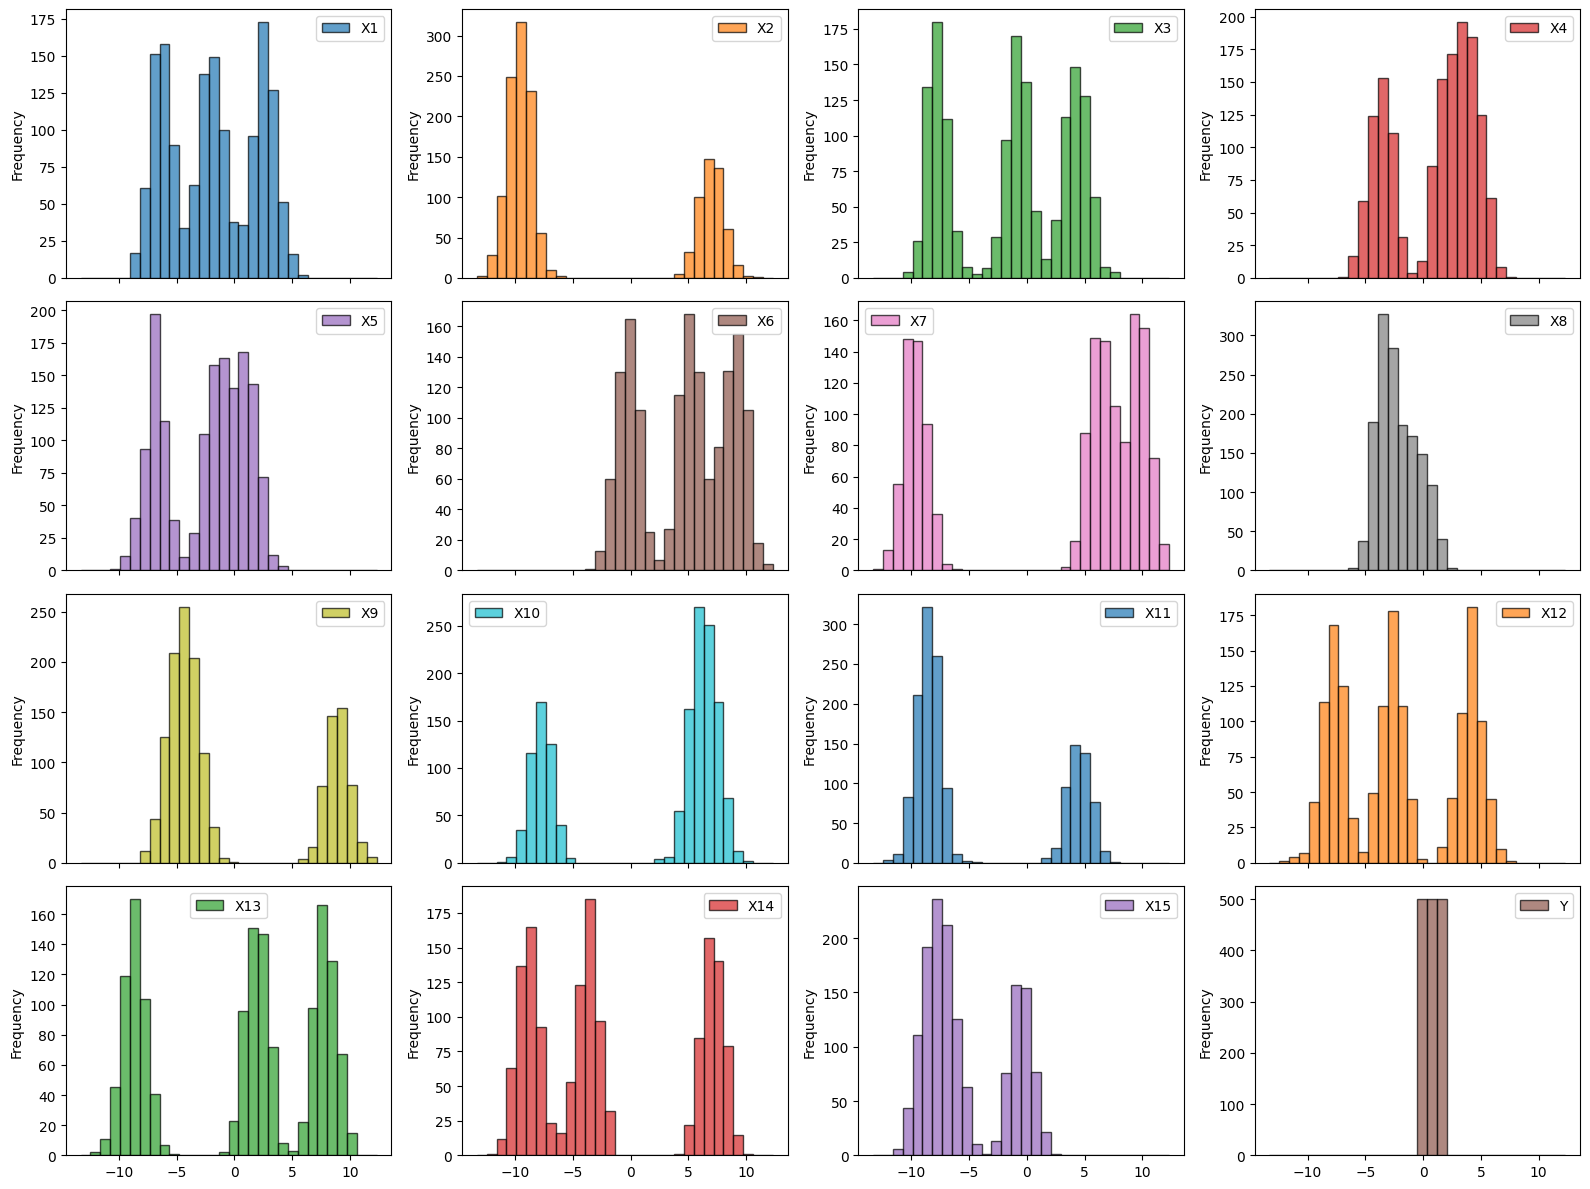

In [9]:
df.plot(
    kind="hist",
    subplots=True,
    layout=(4, 4),
    bins=30,
    figsize=(16, 12),
    alpha=0.7,
    edgecolor="black",
)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.mixture import GaussianMixture
import numpy as np


def test_gmm_components(x, max_components=5):
    x = x.dropna().values.reshape(-1, 1)
    bics = []
    for k in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=k, random_state=0).fit(x)
        bics.append(gmm.bic(x))
    best_k = np.argmin(bics) + 1
    return best_k, bics


gmm_results = {}

for col in df.columns:
    if col == "Y":
        continue
    best_k, bics = test_gmm_components(df[col])
    gmm_results[col] = {"optimal_components": best_k, "bics": bics}

for col, result in gmm_results.items():
    print(f"{col}: GMM with {result['optimal_components']} components")

X1: GMM with 3 components
X2: GMM with 2 components
X3: GMM with 3 components
X4: GMM with 3 components
X5: GMM with 3 components
X6: GMM with 3 components
X7: GMM with 3 components
X8: GMM with 2 components
X9: GMM with 2 components
X10: GMM with 2 components
X11: GMM with 2 components
X12: GMM with 3 components
X13: GMM with 3 components
X14: GMM with 3 components
X15: GMM with 2 components


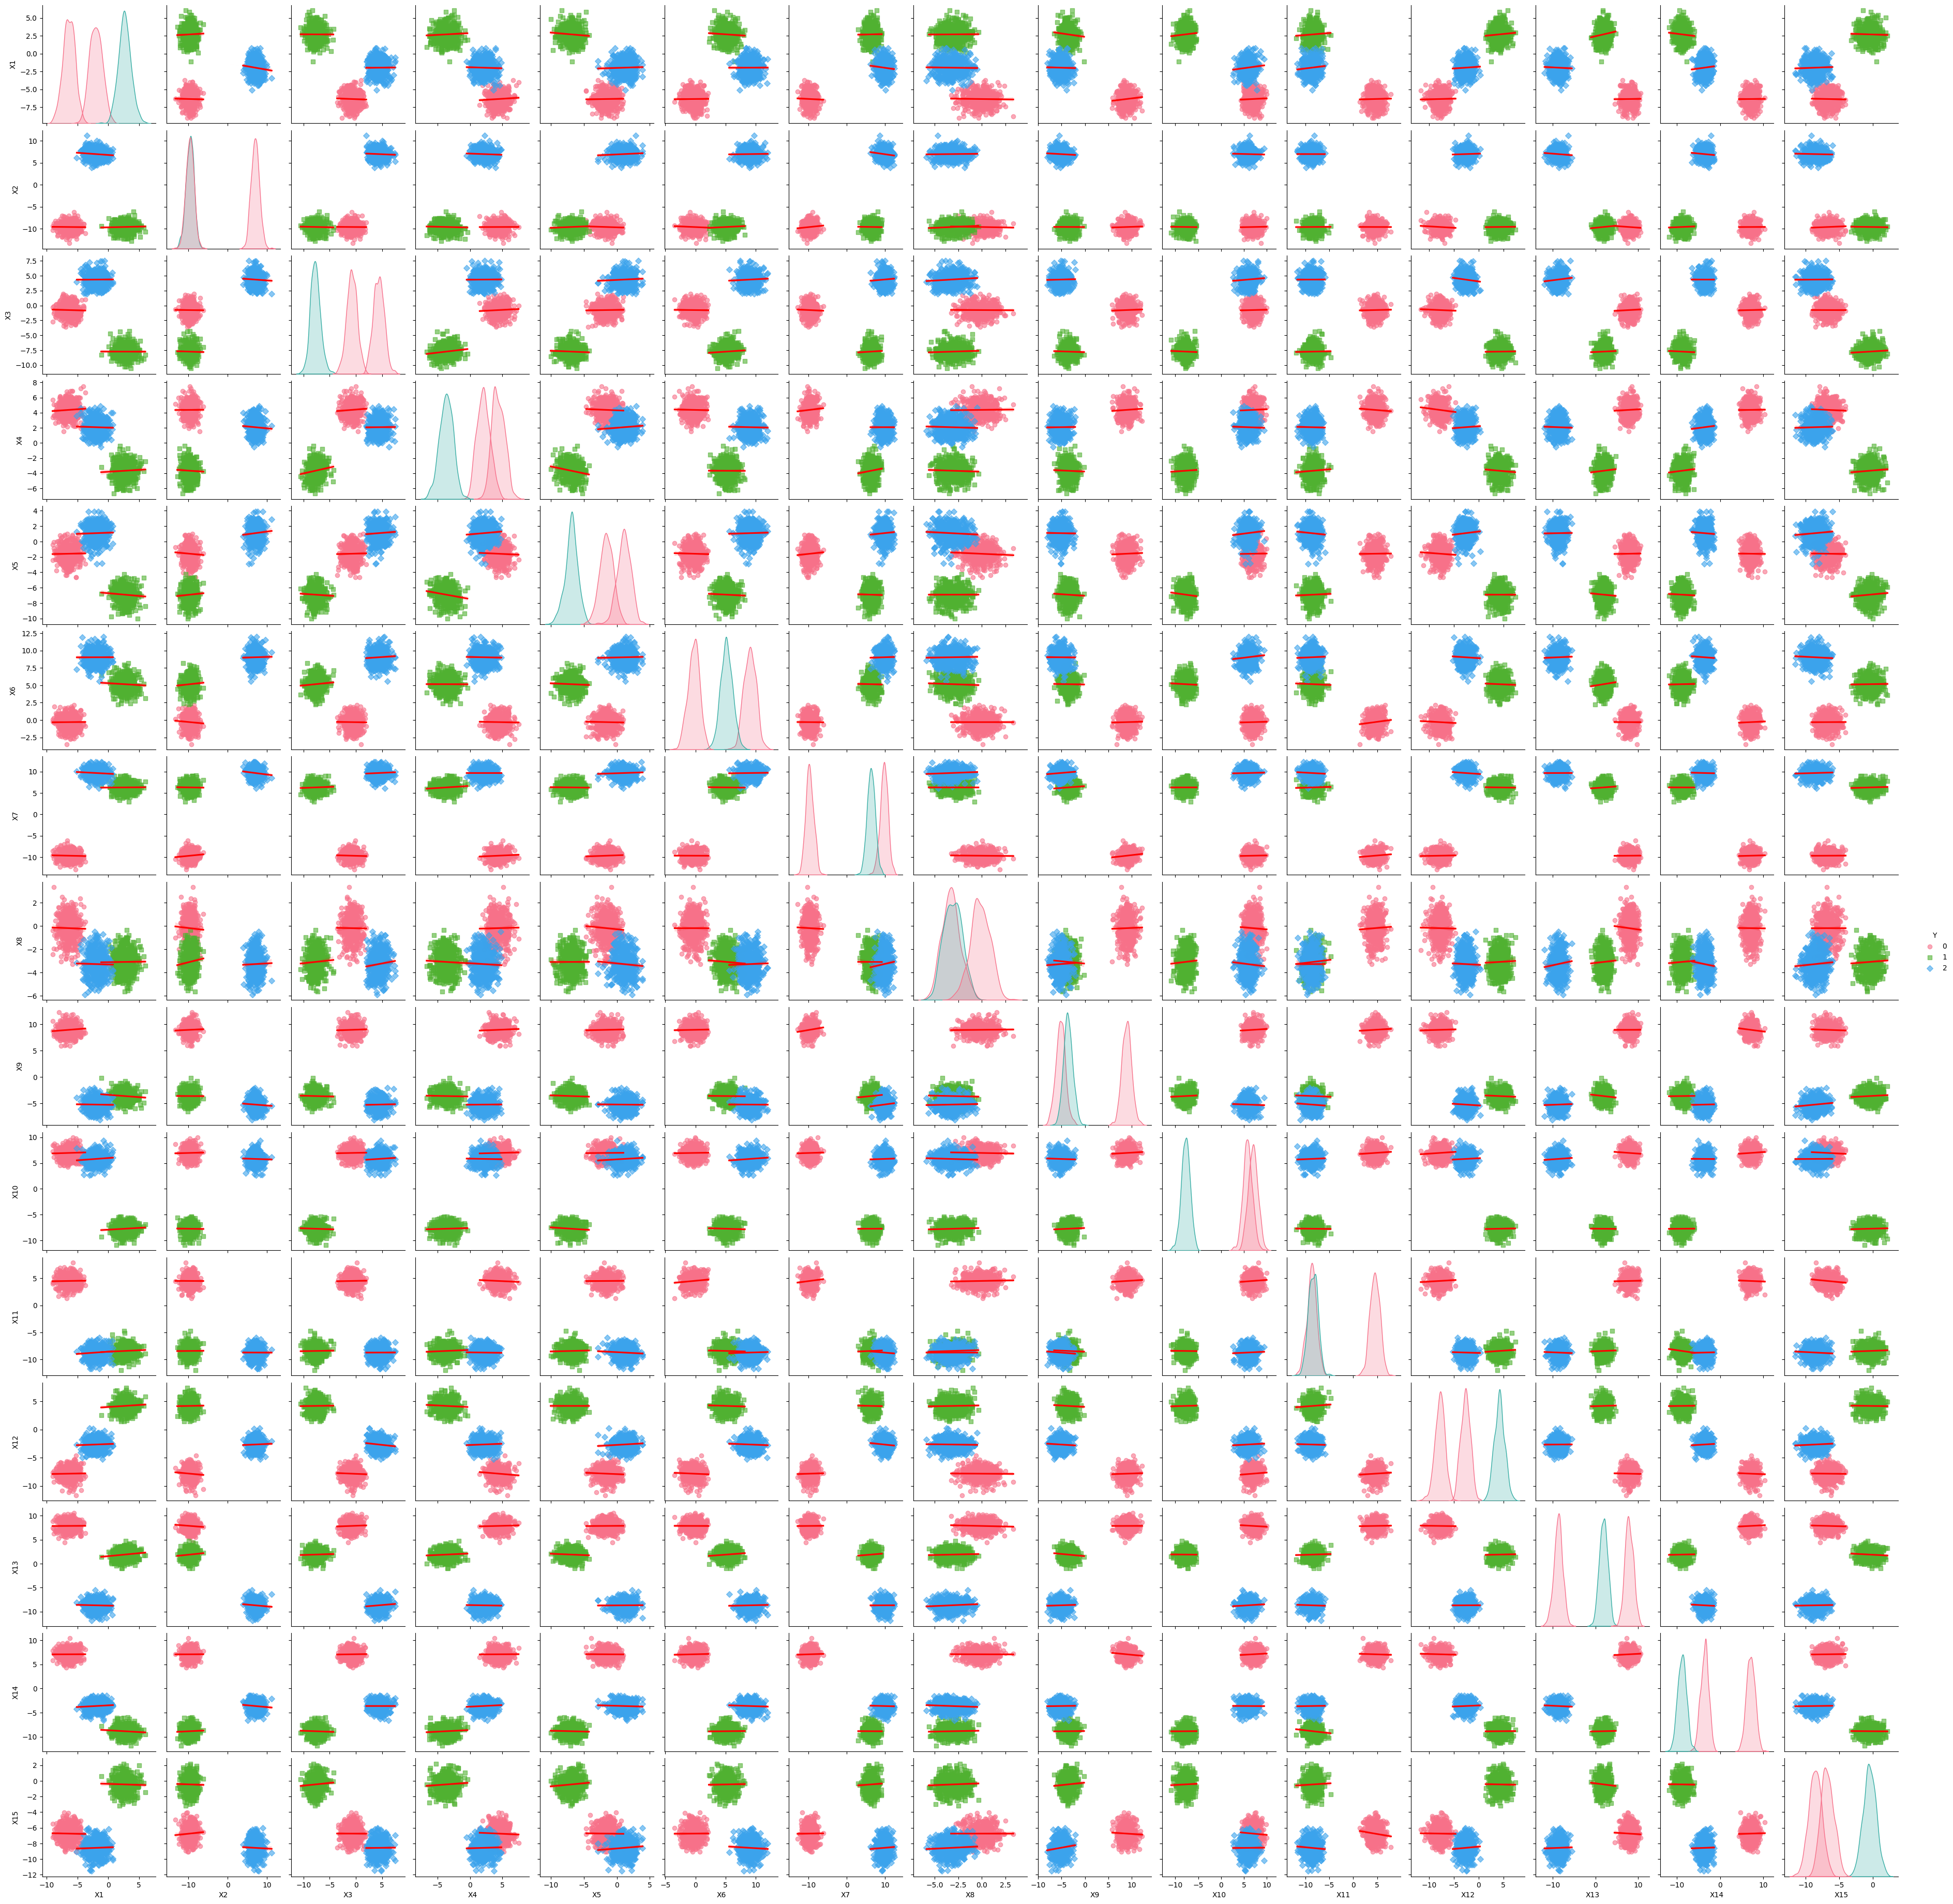

In [11]:
sns.pairplot(
    df,
    hue="Y",
    kind="reg",
    diag_kind="kde",
    markers=["o", "s", "D"],
    palette="husl",
    height=2.5,
    plot_kws={"line_kws": {"color": "red"}, "scatter_kws": {"alpha": 0.6}},
    diag_kws={"shade": True},
)
plt.show()

<Axes: >

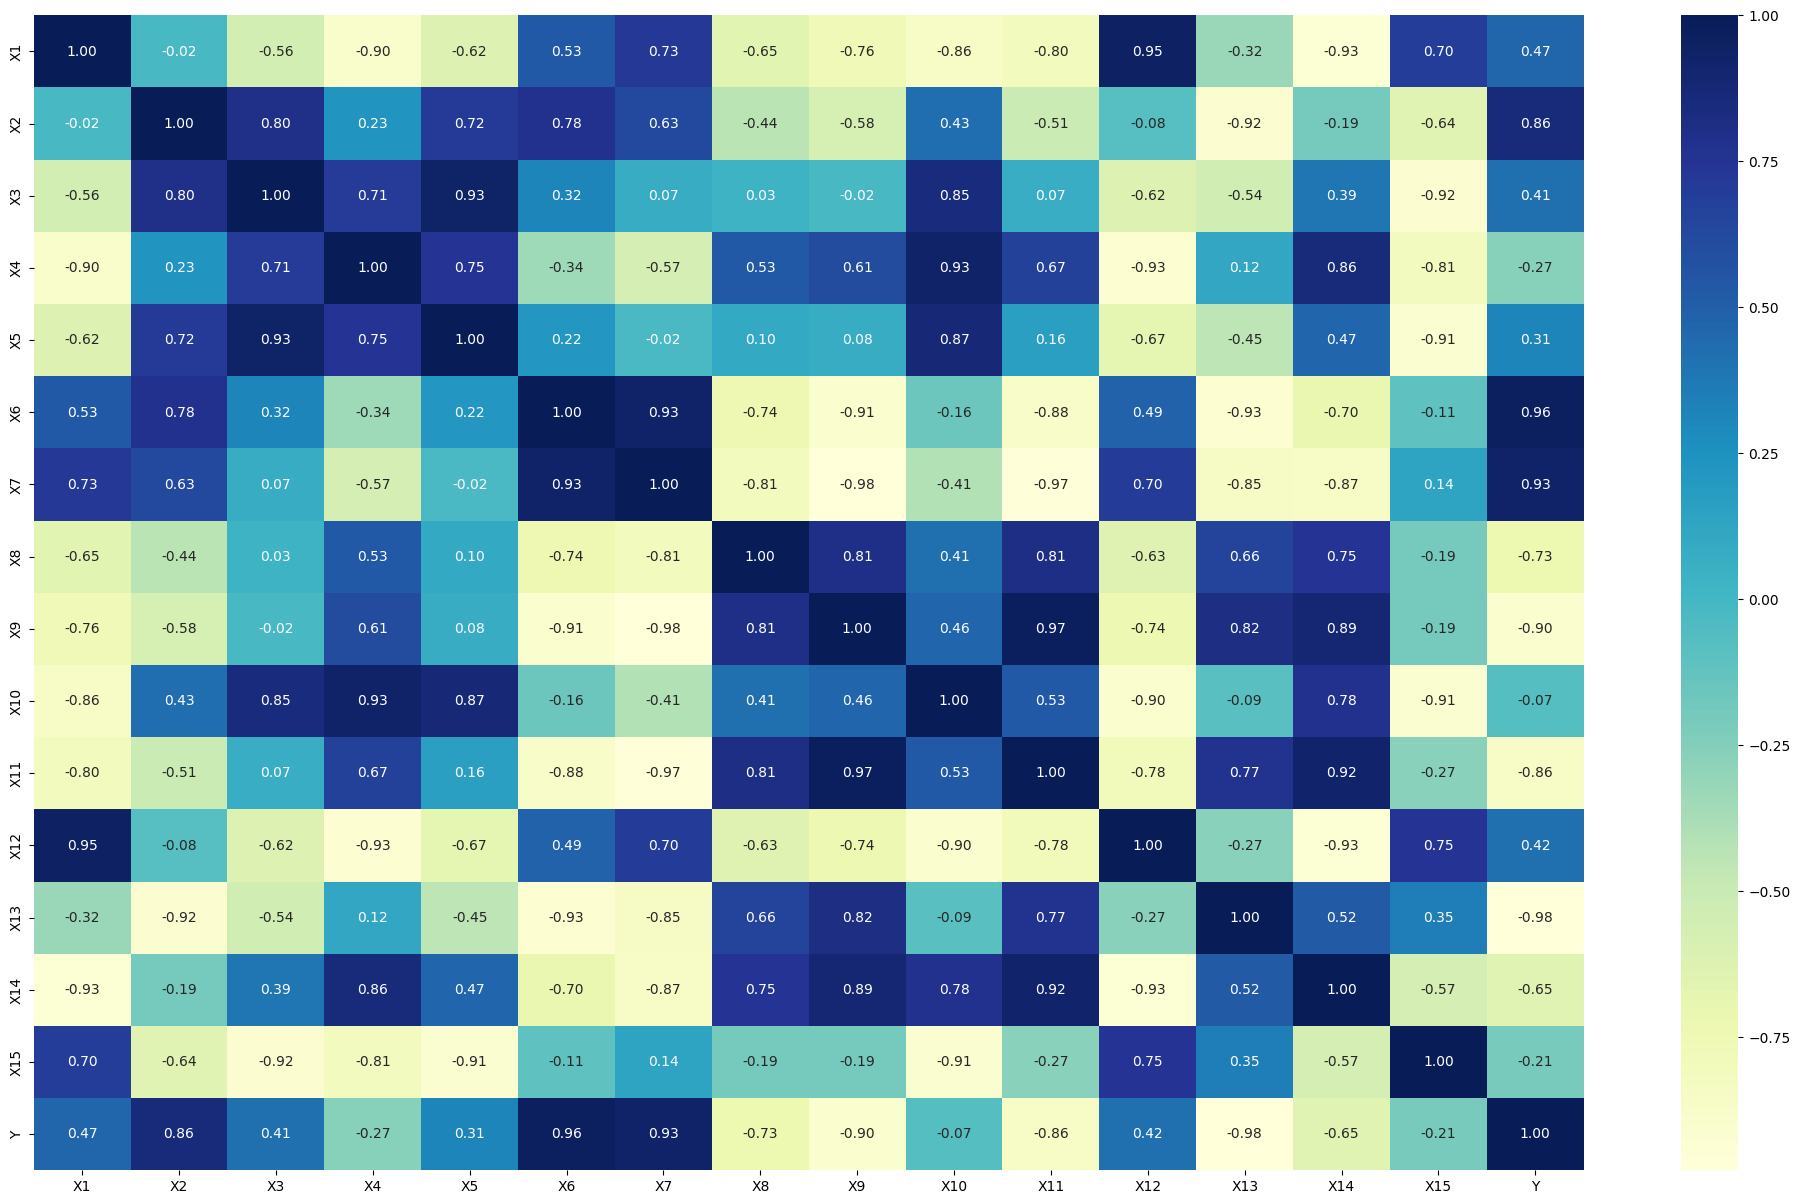

In [12]:
plt.figure(figsize=(25, 15))
sns.heatmap(df[df.columns].corr(), annot=True, fmt="0.2f", cmap="YlGnBu")

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

imputer = IterativeImputer(max_iter=10, random_state=0)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
Y      0
dtype: int64


In [16]:
X = df_imputed.drop("Y", axis=1)
y = df_imputed["Y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression with imputed data Accuracy: {accuracy}")

Logistic Regression with imputed data Accuracy: 1.0


In [17]:
df_without_na = df.dropna()
X = df_without_na.drop("Y", axis=1)
y = df_without_na["Y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression without nulls Accuracy: {accuracy}")

Logistic Regression without nulls Accuracy: 1.0


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression()

logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression without nulls and with scaled data: {accuracy}")

Logistic Regression without nulls and with scaled data: 1.0


In [19]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
y_pred_lda = lda_model.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"Linear Discriminant Analysis Accuracy: {accuracy_lda}")

Linear Discriminant Analysis Accuracy: 1.0


In [20]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scaled, y_train)
y_pred_qda = qda_model.predict(X_test)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Quadratic Discriminant Analysis Accuracy: {accuracy_qda}")

Quadratic Discriminant Analysis Accuracy: 1.0


In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Classification Accuracy: {accuracy_knn}")

K-Nearest Neighbors Classification Accuracy: 1.0


In [22]:
models = {
    "Logistic Regression": logistic_model,
    "LDA": lda_model,
    "QDA": qda_model,
    "KNN": knn_model,
}

from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    PrecisionRecallDisplay,
)
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": logistic_model,
    "LDA": lda_model,
    "QDA": qda_model,
    "KNN": knn_model,
}

for name, model in models.items():
    print(f"Evaluating {name}:")
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-score (weighted): {f1:.4f}")
    print("-" * 30)

Evaluating Logistic Regression:
Confusion Matrix:
[[108   0   0]
 [  0  94   0]
 [  0   0  95]]
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000
------------------------------
Evaluating LDA:
Confusion Matrix:
[[108   0   0]
 [  0  94   0]
 [  0   0  95]]
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000
------------------------------
Evaluating QDA:
Confusion Matrix:
[[108   0   0]
 [  0  94   0]
 [  0   0  95]]
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000
------------------------------
Evaluating KNN:
Confusion Matrix:
[[108   0   0]
 [  0  94   0]
 [  0   0  95]]
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000
------------------------------


In [23]:
display(df.corr()["Y"].sort_values(ascending=False))

Y      1.000000
X6     0.964112
X7     0.929225
X2     0.859208
X1     0.468053
X12    0.419889
X3     0.413604
X5     0.313823
X10   -0.070467
X15   -0.206560
X4    -0.265007
X14   -0.652486
X8    -0.728787
X11   -0.863972
X9    -0.902045
X13   -0.977363
Name: Y, dtype: float64

In [24]:
features = df.columns.drop("Y")

In [25]:
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

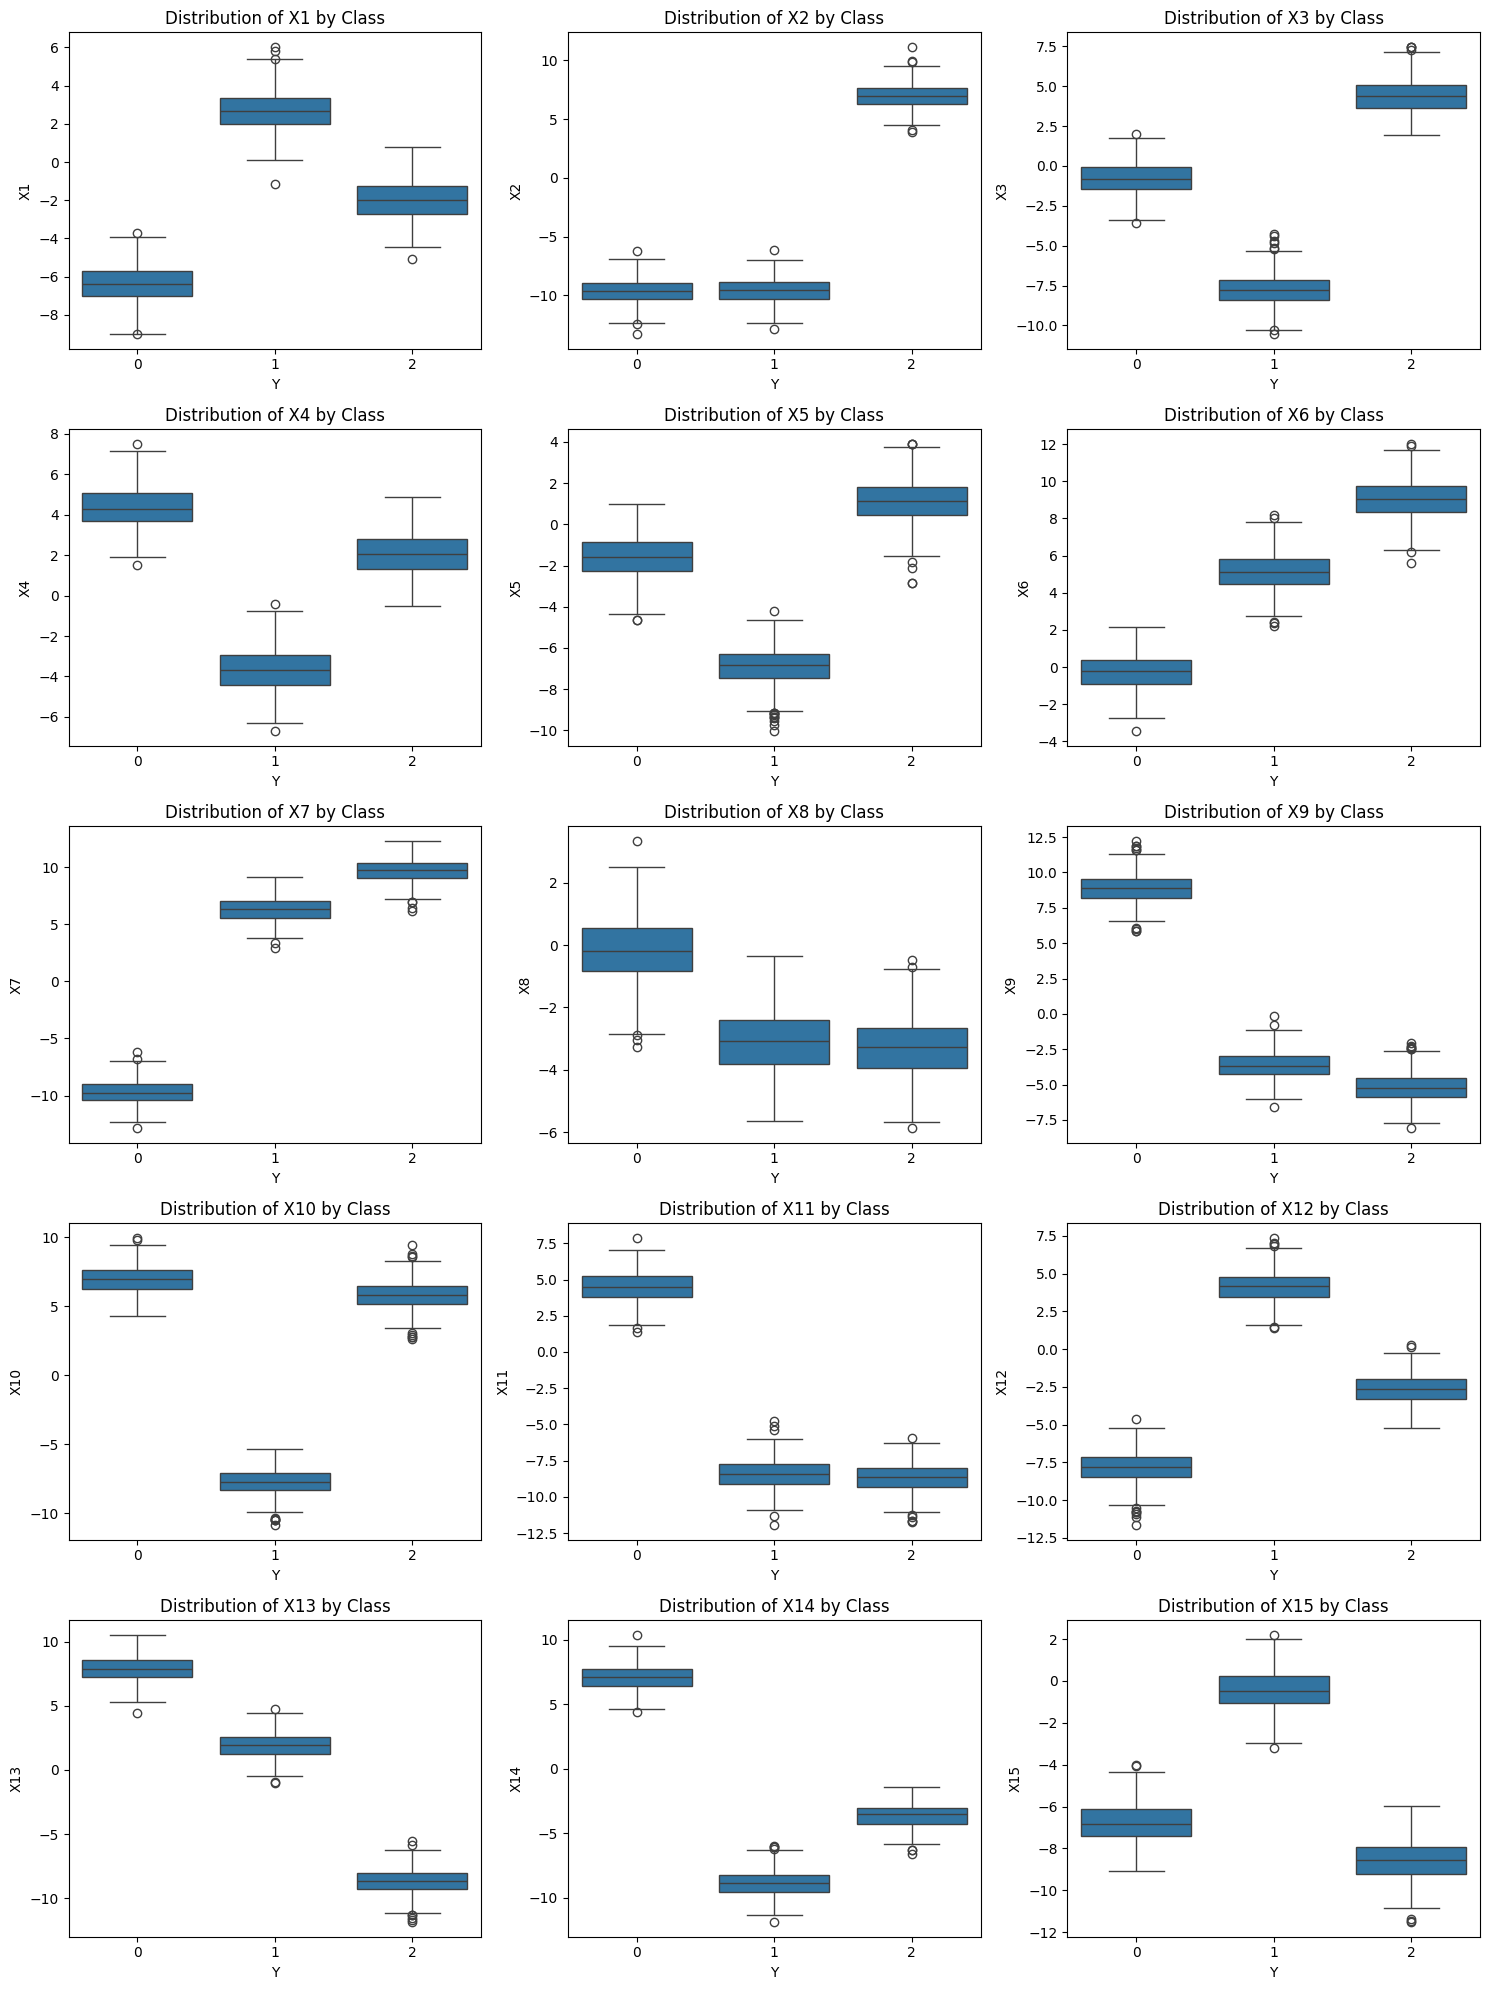

In [26]:
plt.figure(figsize=(15, n_rows * 4))
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x="Y", y=feature, data=df)
    plt.title(f"Distribution of {feature} by Class")
plt.tight_layout()
plt.show()

In [27]:
high_corr_features = ["X6", "X7", "X2", "X13"]
n_high_corr = len(high_corr_features)
n_scatter_plots = n_high_corr * (n_high_corr - 1) // 2
n_cols_scatter = 3
n_rows_scatter = (n_scatter_plots + n_cols_scatter - 1) // n_cols_scatter

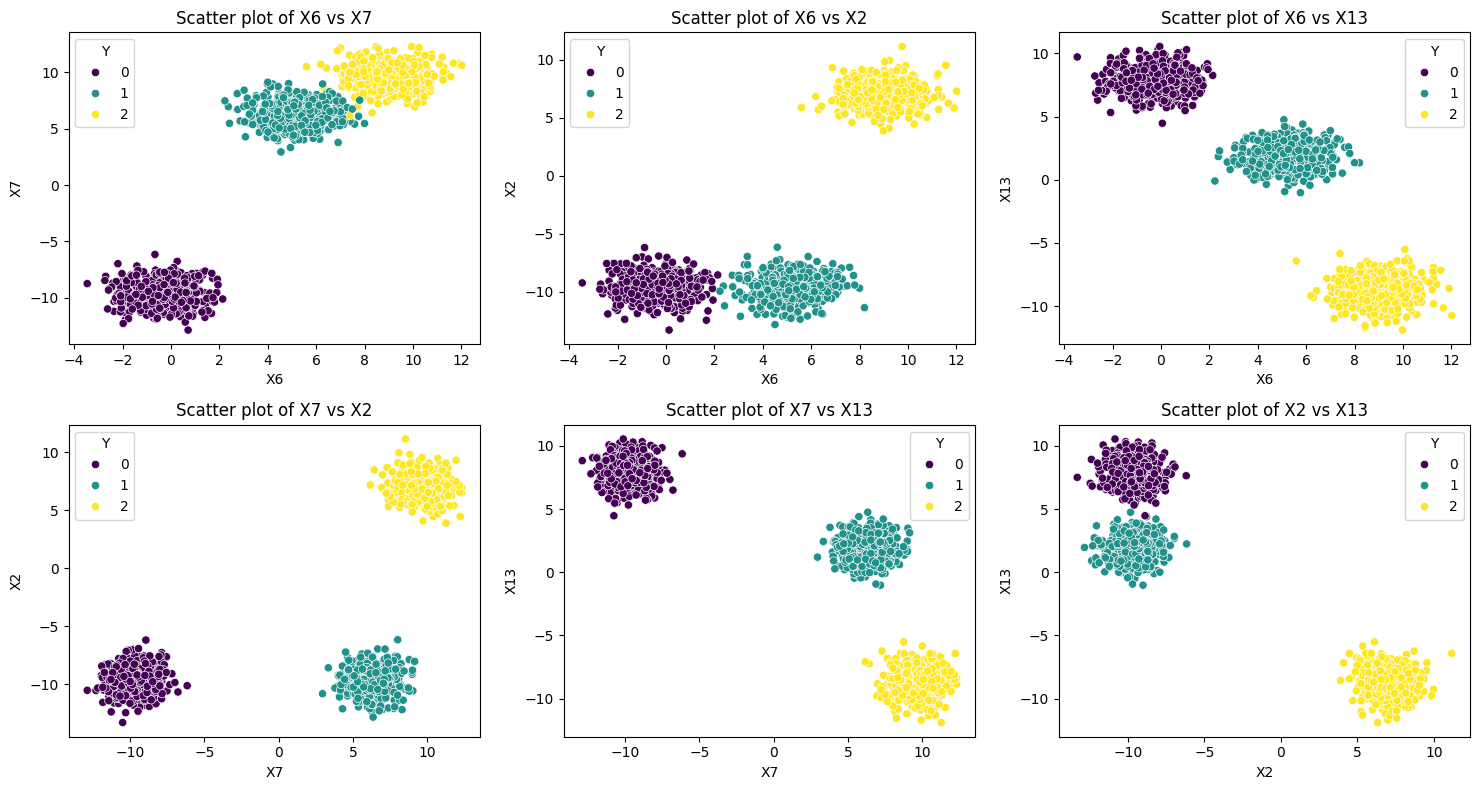

In [28]:
plt.figure(figsize=(15, n_rows_scatter * 4))
plot_index = 1
for i in range(n_high_corr):
    for j in range(i + 1, n_high_corr):
        feature1 = high_corr_features[i]
        feature2 = high_corr_features[j]
        plt.subplot(n_rows_scatter, n_cols_scatter, plot_index)
        sns.scatterplot(data=df, x=feature1, y=feature2, hue="Y", palette="viridis")
        plt.title(f"Scatter plot of {feature1} vs {feature2}")
        plot_index += 1
plt.tight_layout()
plt.show()

In [29]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
df_pca["Y"] = y.reset_index(drop=True)

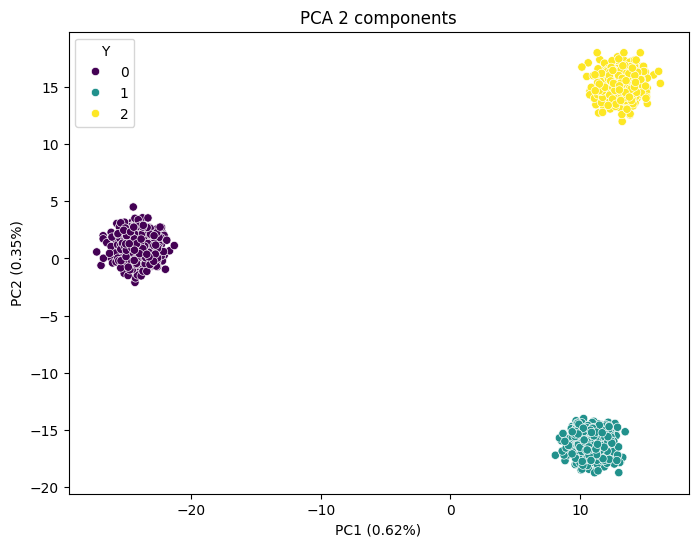

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Y", palette="viridis")
plt.title("PCA 2 components")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2f}%)")
plt.show()

In [31]:
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(X)
df_pca_3d = pd.DataFrame(data=pca_result_3d, columns=["PC1", "PC2", "PC3"])
df_pca_3d["Y"] = y.reset_index(drop=True)

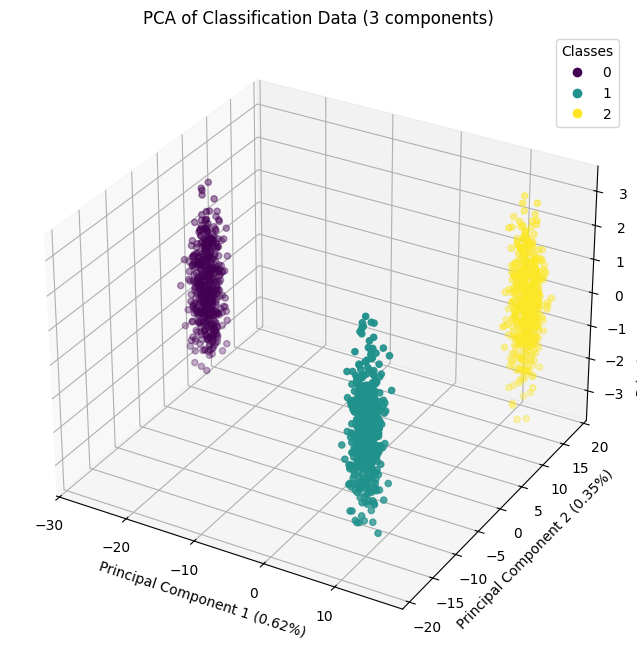

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    df_pca_3d["PC1"],
    df_pca_3d["PC2"],
    df_pca_3d["PC3"],
    c=df_pca_3d["Y"],
    cmap="viridis",
)
ax.set_title("PCA of Classification Data (3 components)")
ax.set_xlabel(f"Principal Component 1 ({pca_3d.explained_variance_ratio_[0]:.2f}%)")
ax.set_ylabel(f"Principal Component 2 ({pca_3d.explained_variance_ratio_[1]:.2f}%)")
ax.set_zlabel(f"Principal Component 3 ({pca_3d.explained_variance_ratio_[2]:.2f}%)")
legend = ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_features = df_without_na.drop("Y", axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X_features.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_features.values, i)
    for i in range(len(X_features.columns))
]

display(vif_data.sort_values(by="VIF", ascending=False))

feature        VIF
6       X7  52.978855
13     X14  42.144400
10     X11  41.025384
1       X2  39.682182
12     X13  38.514948
9      X10  35.837102
8       X9  34.093331
5       X6  30.431179
14     X15  29.243941
11     X12  25.662399
2       X3  23.687716
0       X1  16.243252
4       X5  16.189734
3       X4  12.689104
7       X8   7.582129

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_features = df_without_na.drop("Y", axis=1).copy()
threshold = 5

while True:
    vif_data = pd.DataFrame(
        {
            "feature": X_features.columns,
            "VIF": [
                variance_inflation_factor(X_features.values, i)
                for i in range(X_features.shape[1])
            ],
        }
    ).sort_values("VIF", ascending=False)

    max_vif = vif_data["VIF"].iloc[0]
    drop_feature = vif_data["feature"].iloc[0]
    print(vif_data, "\n")

    if max_vif <= threshold:
        print("All VIF values are below the threshold!")
        break

    if drop_feature in X_features.columns:
        print(f"Dropping {drop_feature} with VIF = {max_vif:.2f}")
        X_features = X_features.drop(columns=[drop_feature])
    else:
        print(f"» Warning: {drop_feature} not found in X_features, skipping.")
        break

   feature        VIF
6       X7  52.978855
13     X14  42.144400
10     X11  41.025384
1       X2  39.682182
12     X13  38.514948
9      X10  35.837102
8       X9  34.093331
5       X6  30.431179
14     X15  29.243941
11     X12  25.662399
2       X3  23.687716
0       X1  16.243252
4       X5  16.189734
3       X4  12.689104
7       X8   7.582129 

Dropping X7 with VIF = 52.98
   feature        VIF
12     X14  39.303975
1       X2  38.754066
9      X11  37.517855
11     X13  36.587792
8      X10  35.708046
7       X9  33.336703
13     X15  29.206697
5       X6  28.931070
10     X12  25.416008
2       X3  23.643420
4       X5  16.186650
0       X1  16.155865
3       X4  12.687135
6       X8   7.562611 

Dropping X14 with VIF = 39.30
   feature        VIF
1       X2  38.646431
11     X13  35.944231
9      X11  34.497786
8      X10  33.931380
7       X9  32.343365
12     X15  29.200065
5       X6  27.481546
10     X12  24.910346
2       X3  23.460596
4       X5  16.026280
0       X1  1

In [35]:
print(f"Final number of features: {X_features.shape[1]}")
print("Remaining features:", list(X_features.columns))

Final number of features: 3
Remaining features: ['X1', 'X8', 'X13']


In [36]:
selected_features = X_features.columns
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

logistic_model = LogisticRegression()

logistic_model.fit(X_train_selected, y_train)

y_pred = logistic_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression with selected features Accuracy: {accuracy}")

Logistic Regression with selected features Accuracy: 1.0


In [37]:
pca = PCA()
X_pca = pca.fit_transform(X_features)

explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print("Cumulative variance:", explained_variance.cumsum())

Explained variance ratio: [0.78564775 0.19931698 0.01503527]
Cumulative variance: [0.78564775 0.98496473 1.        ]


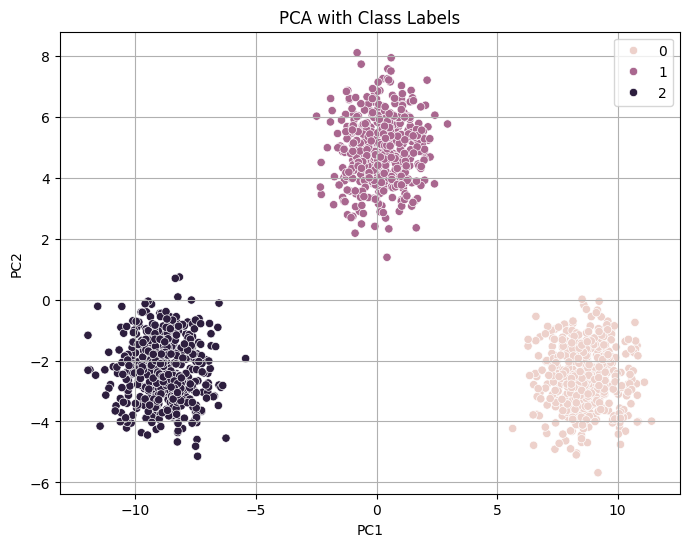

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_without_na["Y"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA with Class Labels")
plt.legend()
plt.grid(True)
plt.show()

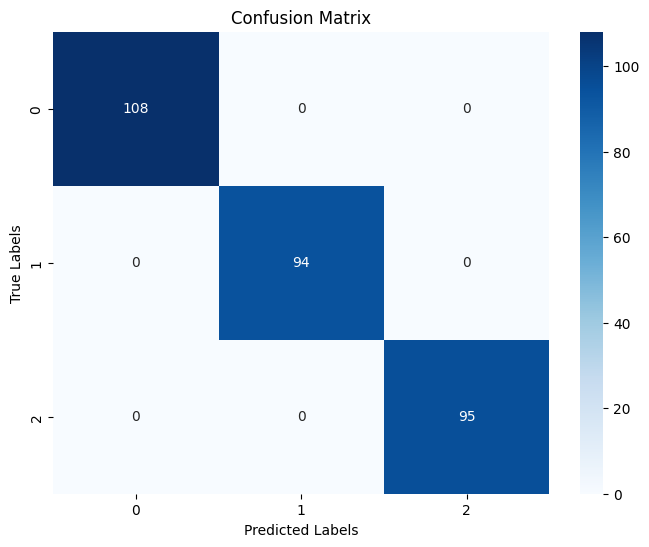

NameError: name 'classification_report' is not defined

In [39]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Precision: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297

Confusion Matrix:
[[108   0   0]
 [  0  94   0]
 [  0   0  95]]


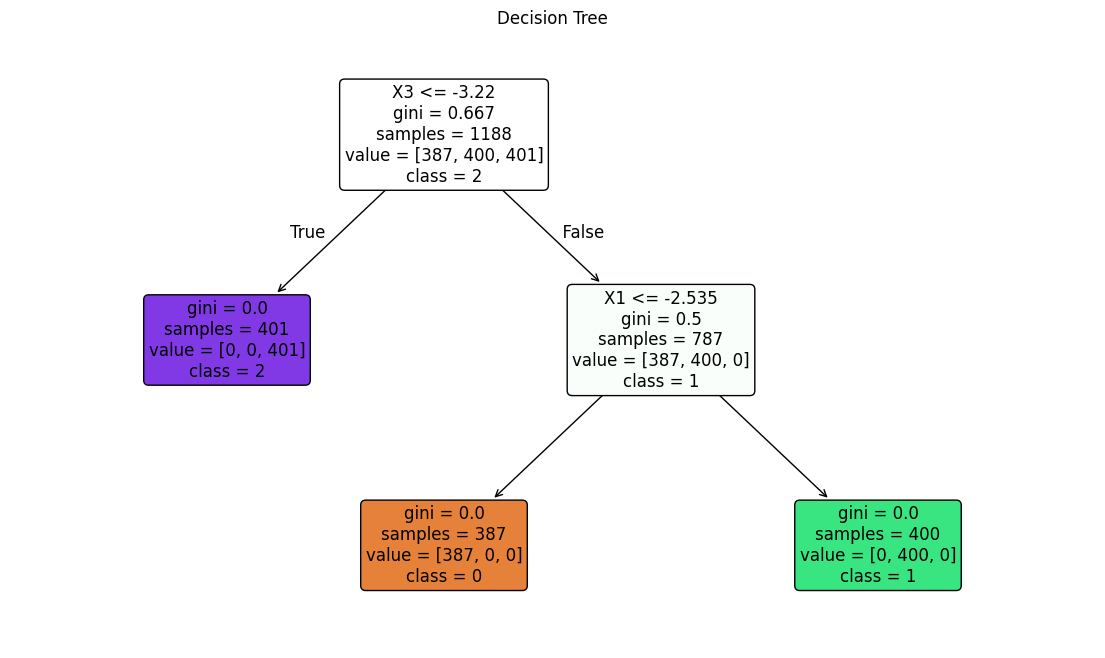

In [41]:
from sklearn.tree import plot_tree

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X_features.columns,
    class_names=[str(c) for c in clf.classes_],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph.render("tree", format="png", cleanup=False)
graph.view()

plt.figure(figsize=(14, 8))
plot_tree(
    clf,
    filled=True,
    rounded=True,
    feature_names=X_train.columns,
    class_names=[str(c) for c in clf.classes_],
    fontsize=12,
)
plt.title("Decision Tree")
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False],
}

grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)

grid_search.fit(X_train_selected, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")

print("Best parameters found:", grid_search.best_params_)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Precision: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297

Confusion Matrix:
[[108   0   0]
 [  0  94   0]
 [  0   0  95]]


In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)

base_estimator = DecisionTreeClassifier(random_state=42)

ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

param_grid_ada = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "estimator__max_depth": [1, 3, 5],
    "estimator__min_samples_split": [2, 5],
}

grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

grid_search_ada.fit(X_train_selected, y_train)

best_ada = grid_search_ada.best_estimator_

y_pred = best_ada.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")

print("Best parameters found:", grid_search_ada.best_params_)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'estimator__max_depth': 3, 'estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 50}

Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Precision: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297

Confusion Matrix:
[[108   0   0]
 [  0  94   0]
 [  0   0  95]]


In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)

xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

grid_search_xgb.fit(X_train_selected, y_train)

best_xgb = grid_search_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test_selected)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb, average="weighted")
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")
precision_xgb = precision_score(y_test, y_pred_xgb, average="weighted")

print("Best parameters found for XGBoost:", grid_search_xgb.best_params_)
print(f"\nAccuracy: {accuracy_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/enriquegomeztagle/anaconda3/envs/ML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:23:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/enriquegomeztagle/anaconda3/envs/ML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:23:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/enriquegomeztagle/anaconda3/envs/ML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:23:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/enriquegomeztagle/anaconda3/envs/ML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:23:55] WARNING: /Users/runner/work/xgboost/

Best parameters found for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Precision: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297

Confusion Matrix:
[[108   0   0]
 [  0  94   0]
 [  0   0  95]]


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

model = Sequential()
model.add(Dense(units=32, activation="relu", input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=len(set(y_train)), activation="softmax"))

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    X_train_scaled, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1
)

loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nSingle-layer NN Accuracy: {accuracy:.4f}")

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4403 - loss: 0.9770 - val_accuracy: 0.8950 - val_loss: 0.6464
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.9599 - loss: 0.5743 - val_accuracy: 1.0000 - val_loss: 0.3592
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 1.0000 - loss: 0.3098 - val_accuracy: 1.0000 - val_loss: 0.1855
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 1.0000 - loss: 0.1605 - val_accuracy: 1.0000 - val_loss: 0.1007
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 1.0000 - loss: 0.0897 - val_accuracy: 1.0000 - val_loss: 0.0611
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 1.0000 - loss: 0.0569 - val_accuracy: 1.0000 - val_loss: 0.0406
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 1.0000 - loss: 0.0392 - val_accuracy: 1.0000 - val_loss: 0.0290
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 1.0000 - loss: 0.0265 - val_accuracy: 1.00

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True, verbose=1
)

model_mlp = Sequential()
model_mlp.add(Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)))
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(32, activation="relu"))
model_mlp.add(Dense(len(set(y_train)), activation="softmax"))

model_mlp.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

history = model_mlp.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1,
)

loss_mlp, acc_mlp = model_mlp.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nMultilayer NN Accuracy: {acc_mlp:.4f}")

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5584 - loss: 0.8919 - val_accuracy: 1.0000 - val_loss: 0.2401
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.1784 - val_accuracy: 1.0000 - val_loss: 0.0334
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0348 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - v